# AdaBoosting

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#np.warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, precision_score, accuracy_score,\
                            recall_score, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

sns.set()

df_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1i-KJ2lSvM7OQH0Yd59bX01VoZcq8Sglq')
df_decision = pd.read_csv('https://drive.google.com/uc?export=download&id=1km-AEIMnWVGqMtK-W28n59hqS5Kufhd0')

## Preprocesado

In [2]:
from Preprocessing import *

In [4]:
df = preprod_tp1(df_data, df_decision)
df = replace_nulls_edad(df, 'media')
df = encodear_atributos_categoricos(df)
df.head()

,tipo_de_sala_0,tipo_de_sala_1,tipo_de_sala_2,id_usuario,genero_0,genero_1,edad,amigos,parientes,precio_ticket,nombre_sede_0,nombre_sede_1,nombre_sede_2,cant_acompañantes,volveria
0,0,0,1,117,0,1,73.5,0,0,1,0,0,1,0,0
1,0,0,1,658,1,0,35.0,1,1,2,0,0,1,2,0
2,0,1,0,794,0,1,32.7,0,0,3,0,1,0,0,0
3,0,0,1,455,0,1,32.7,0,0,1,0,1,1,0,0
4,0,0,1,173,1,0,4.0,1,1,2,0,1,1,2,1


## Entrenamiento

In [5]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=117)

### Random Search

In [11]:
params = {'n_estimators': np.arange(25, 100),
          'learning_rate': [0.1, 0.2, 0.4, 0.7],
          'algorithm': ['SAMME', 'SAMME.R'],
         }

model_bagging = AdaBoostClassifier(
        base_estimator = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10,random_state=117, criterion="entropy"),
    random_state=117)

rgscv = RandomizedSearchCV(
    model_bagging, params, n_iter=60, scoring='roc_auc', cv=5, return_train_score=True
).fit(X_train, y_train)

In [12]:
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.8516413131669808
Best params {'n_estimators': 61, 'learning_rate': 0.2, 'algorithm': 'SAMME'}


## Metricas

### Accuracy

In [ ]:
accuracy_score(y_test, rgscv.predict(X_test))

### Precision

In [ ]:
precision_score(y_test, rgscv.predict(X_test))

### Recall

In [ ]:
recall_score(y_test, rgscv.predict(X_test), pos_label=0)

### Matriz de confusion

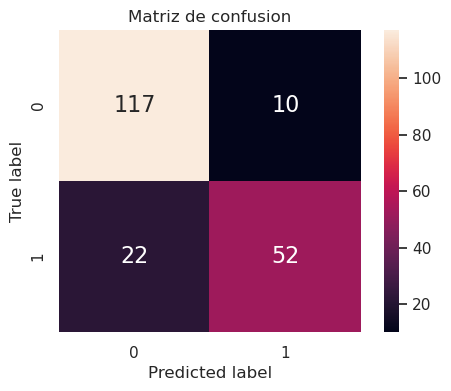

In [13]:
def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test, rgscv.predict(X_test))

### AUC ROC

In [14]:
roc_auc_score(y_test, rgscv.predict_proba(X_test)[:,1])

0.8797616514151948

## Test holdout

In [15]:
# TODO: test holdout